In [1]:
import os
os.chdir('/home')

import numpy as np
import gym
import rl

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

from kerasgym.models import cnn_model_base, DDPGModel
from kerasgym.agents import Agent
from kerasgym.agents.process_action import argmax
from kerasgym.agents.exploration import ScopingPeriodic, EpsilonGreedy
from kerasgym.agents.exploration import graph_schedule

Using TensorFlow backend.


In [2]:
# env
env = gym.make('Breakout-v0')
env.reset()

# model
base_config = {
    'in_shape': env.observation_space.shape,
    'conv_layer_sizes': [],
    'fc_layer_sizes': [16],
    'kernel_sizes': [],
    'strides': [],
    'activation': 'relu'
}

ddpg_config = {
    'action_dim': 4,
    'actor_activation': 'softmax',
    'gamma': 0.3,
    'tau': 0.01,
    'actor_alpha': 0.1,
    'critic_alpha': 0.1
}

base_model = cnn_model_base(**base_config)
model = DDPGModel(base_model, **ddpg_config)

In [3]:
schedule = ScopingPeriodic(amp=0.4, period=0.15, duration=10000)
explorer = EpsilonGreedy(schedule)
buffer_size = 10000
batch_size = 128
agent = Agent(env, [], model, argmax(), explorer,
              buffer_size, batch_size,
              plt=plt, ipy_display=display)
agent.reset()

In [4]:
agent.run_episode()

ValueError: Error when checking target: expected dense_5 to have shape (4,) but got array with shape (1,)

In [8]:
agent.model.critic.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 210, 160, 3)  0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 100800)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           1612816     flatten_1[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
concatenat

In [5]:
agent.replay_buffer.current_size

268


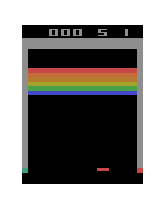
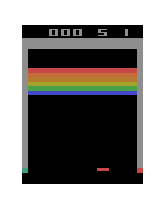
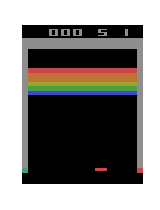
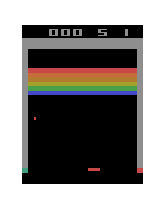
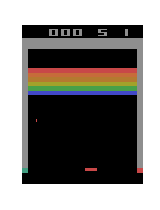
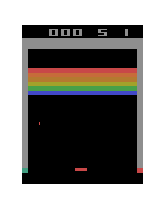
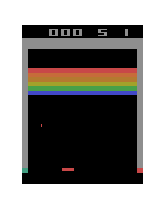
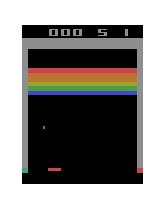
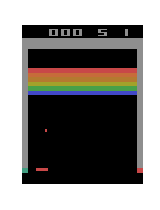
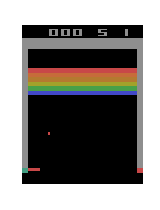
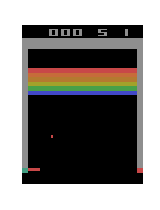
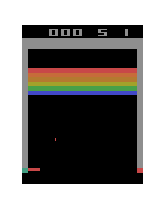
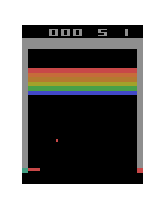
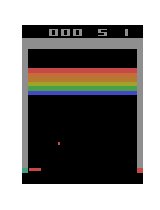
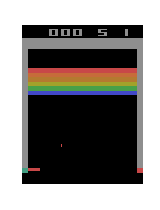
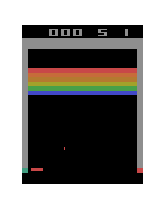
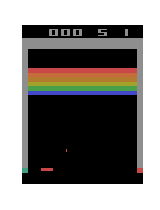
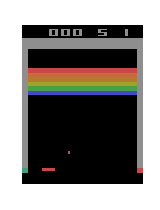
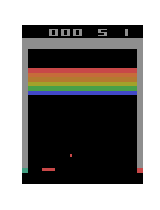
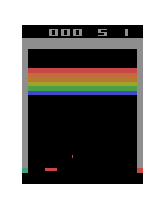
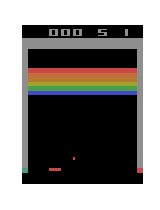
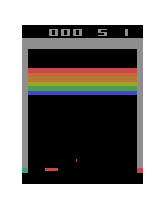
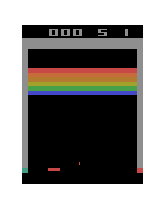
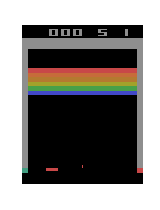
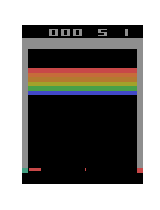
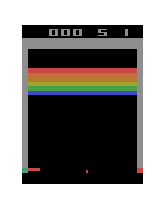
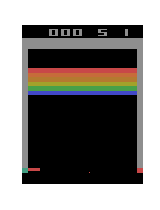
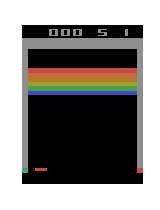
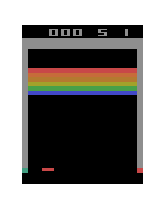
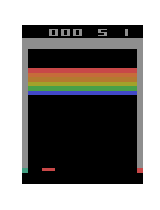
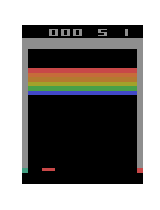
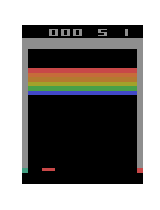
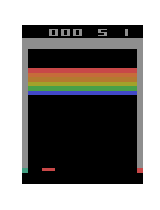
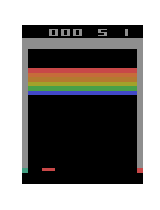
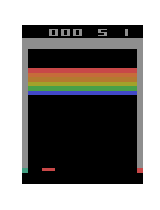
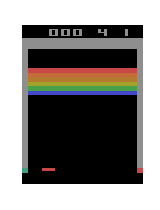
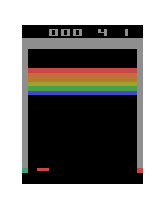
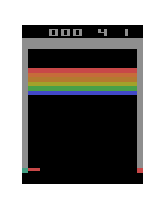
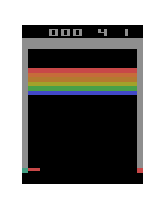
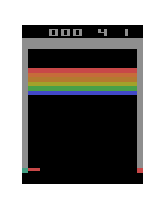
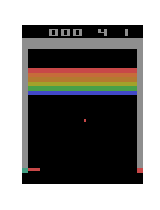
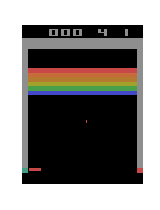
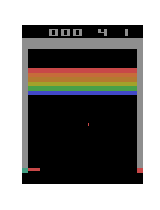
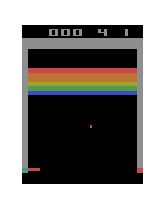
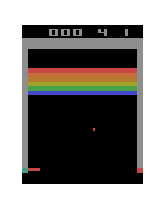
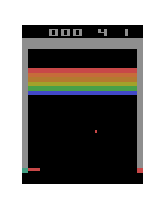
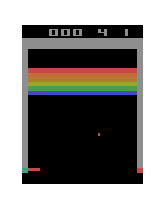
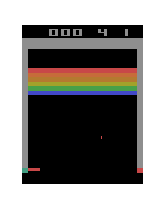
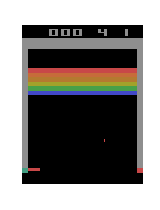
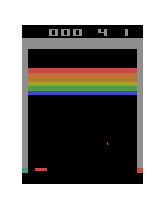
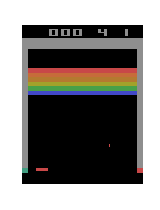
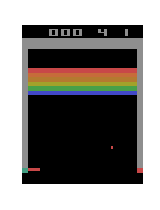
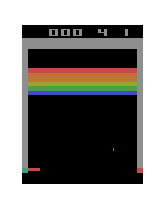
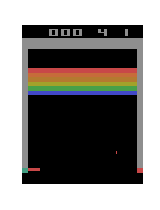
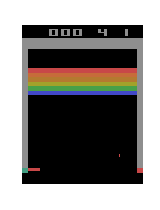
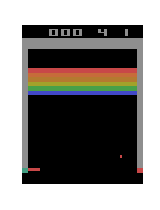
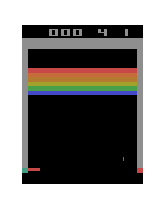
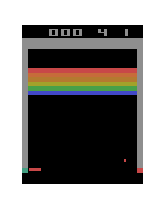
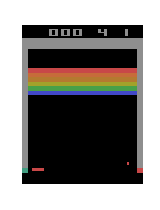
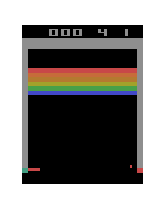
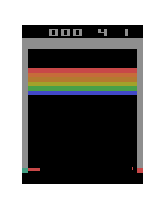
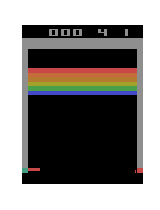
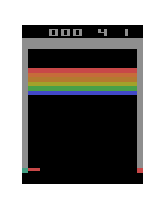
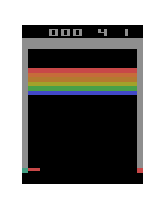
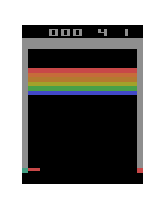
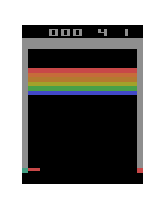
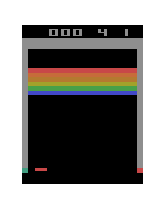
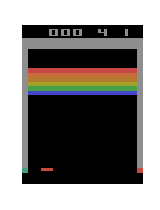
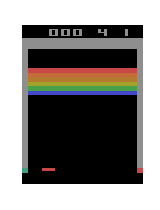
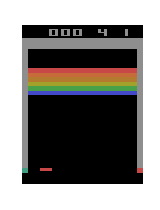
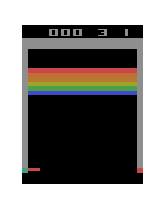
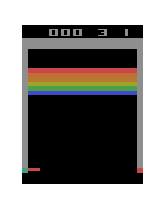
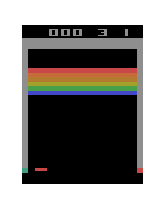
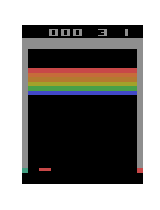
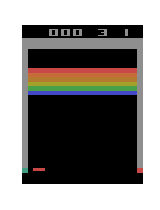
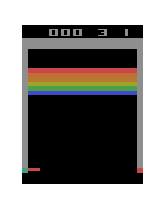
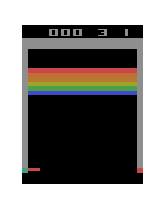
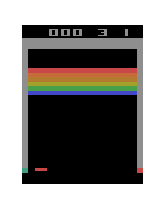
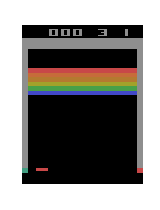
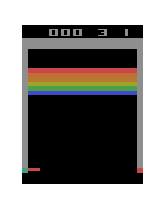
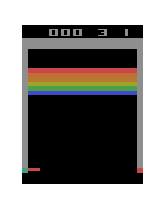
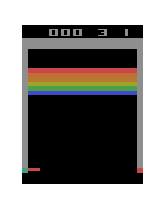
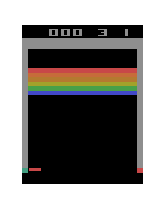
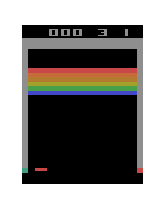
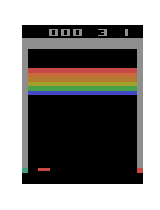
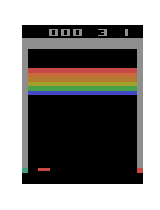
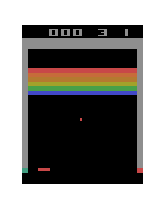
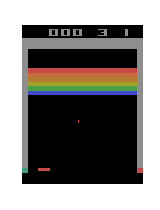
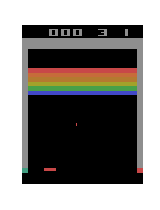
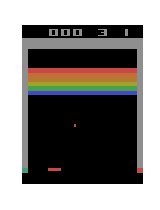
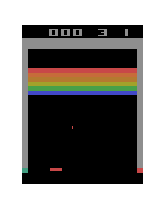
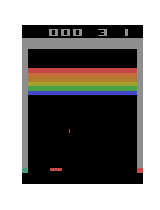
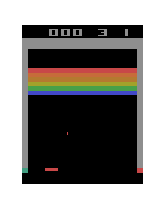
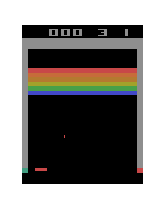
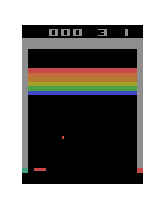
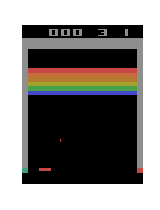
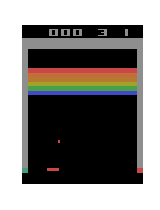
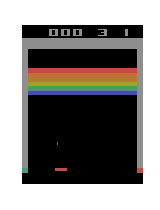
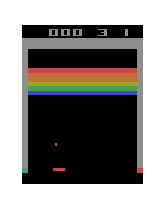
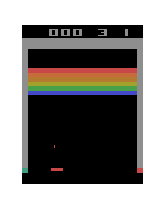
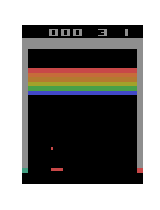
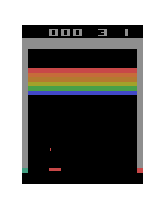
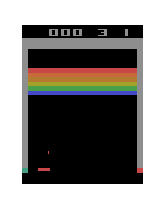
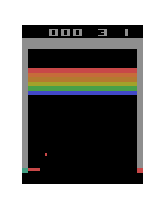
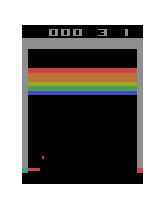
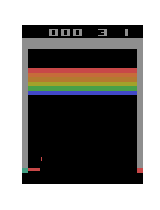
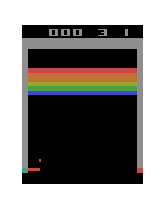
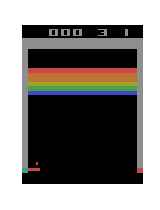
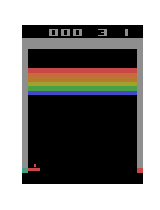
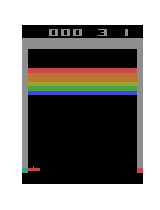
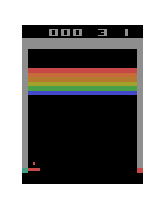
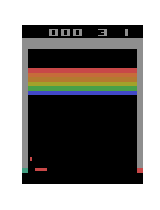
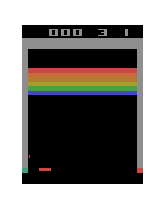
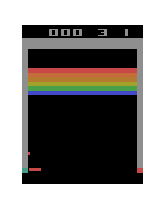
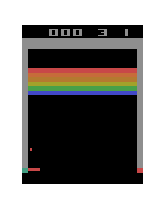
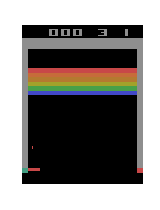
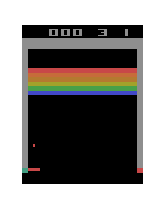
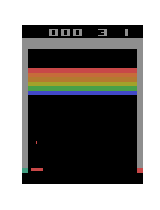
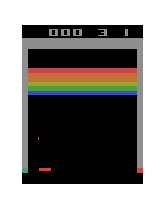
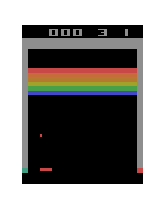
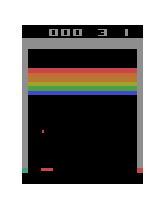
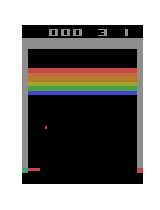
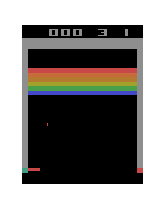
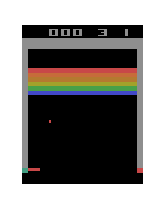
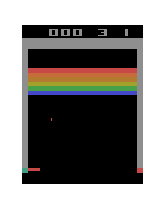
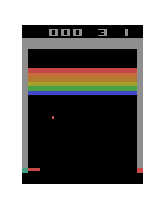
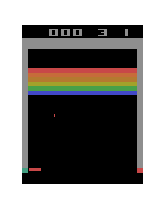
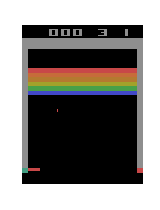
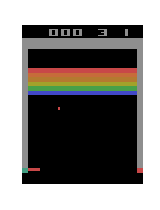
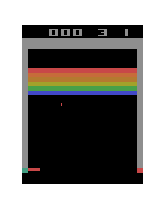
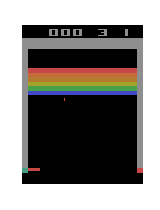
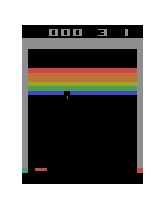
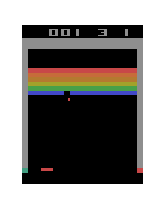
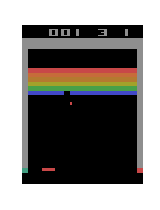
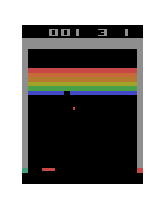
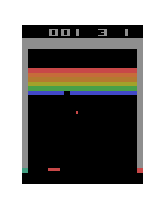
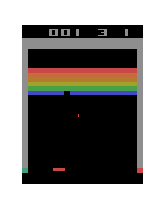
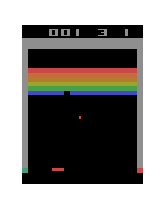
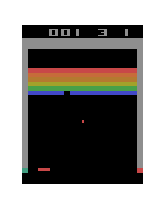
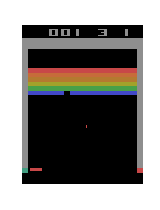
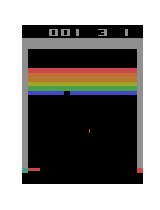
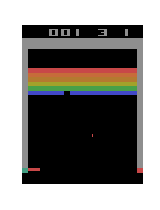
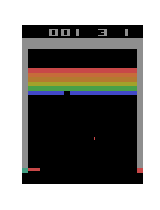
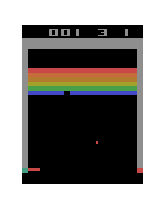
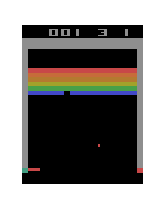
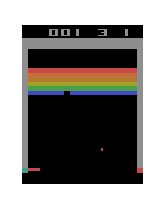
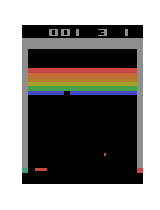
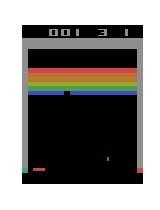
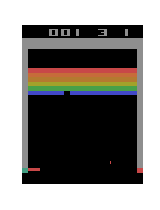
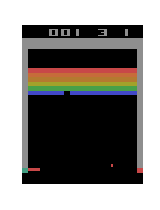
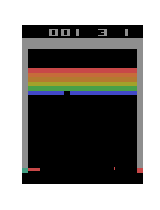
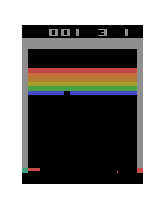
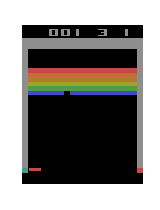
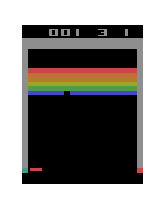
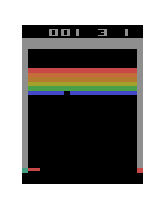
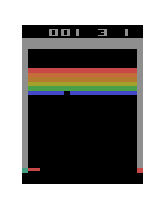
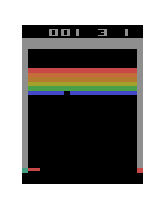
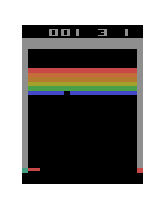
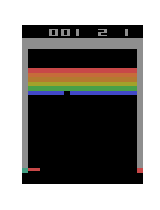
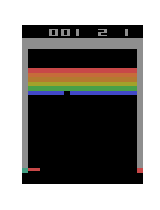
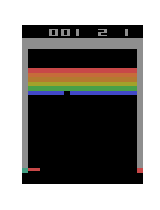
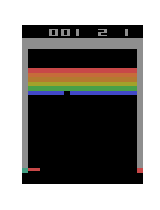
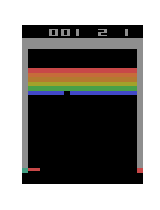
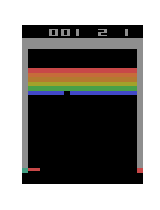
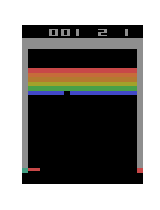
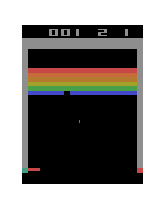
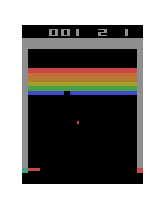
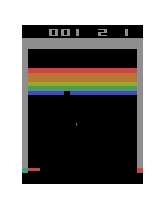
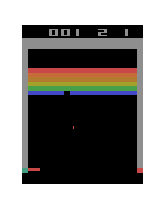
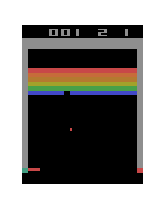
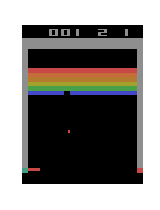
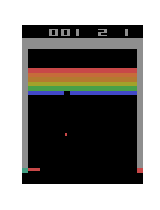
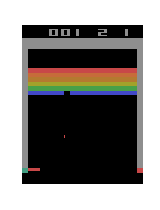
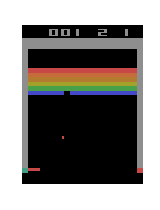
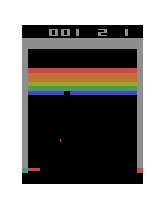
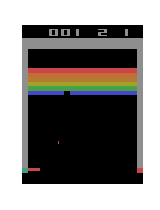
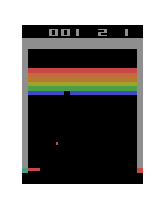
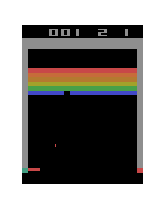
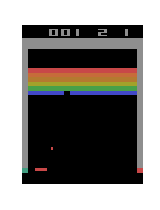
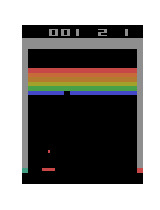
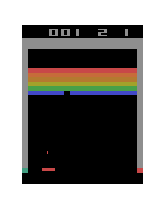
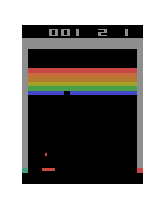
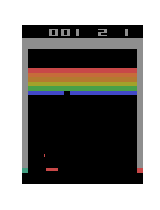
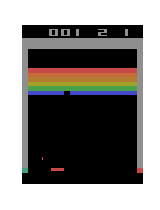
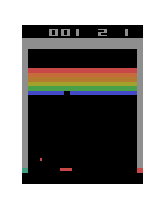
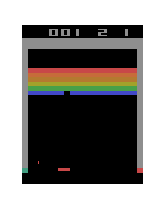
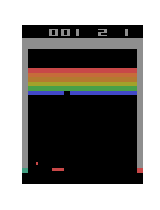
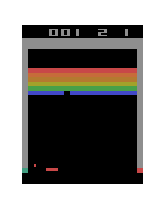
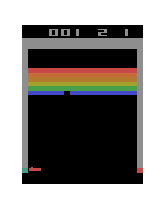
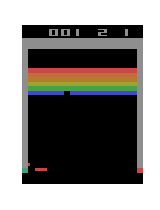
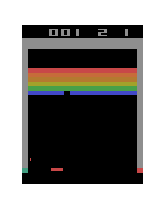
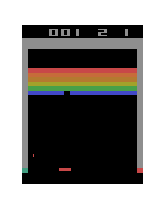
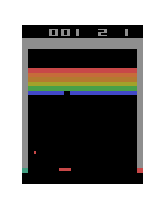
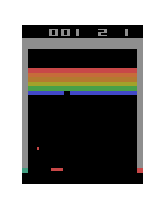
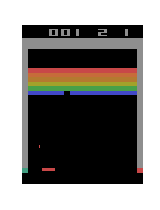
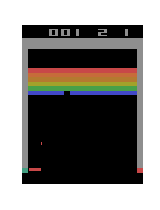
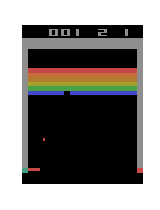
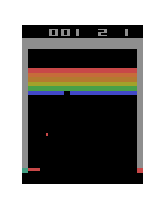
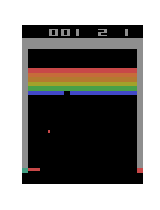
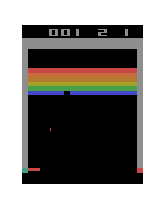
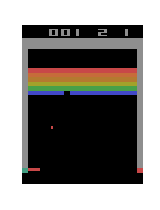
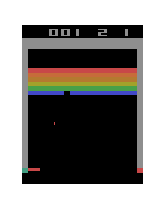
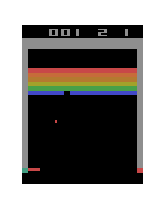
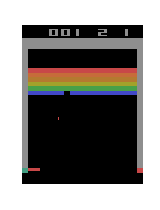
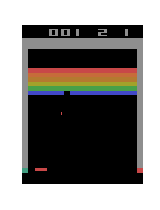
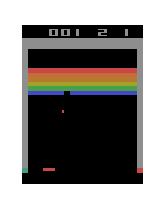
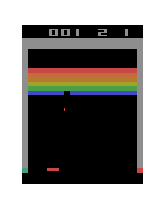
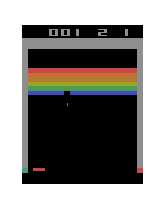
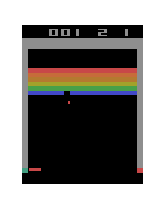
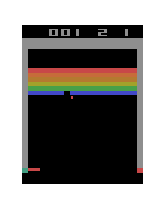
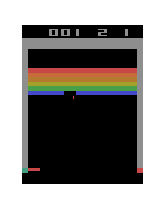
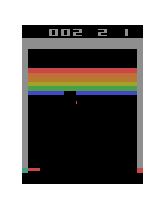
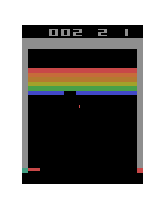
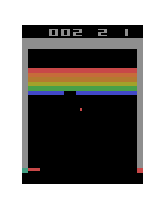
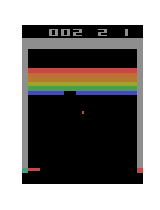
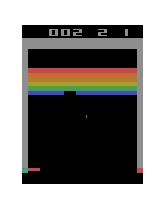
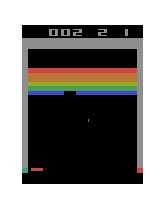
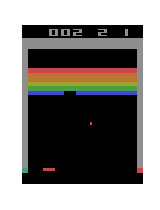
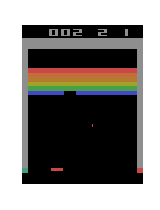
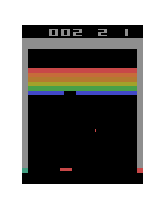
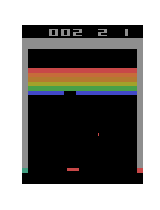
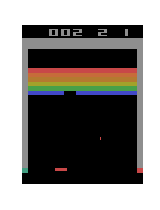
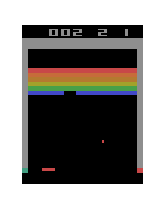
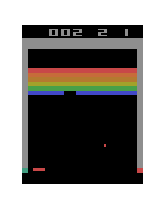
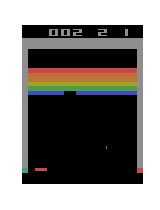
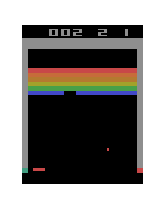
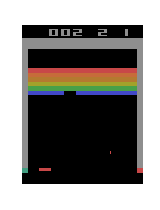
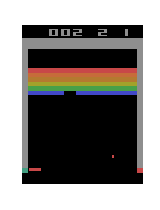
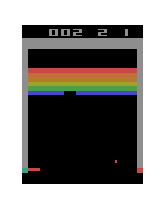
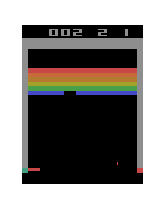
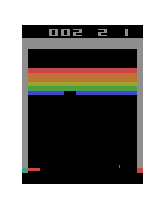
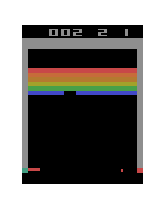
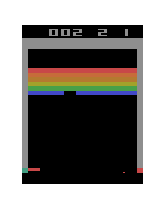
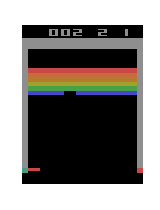
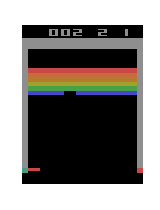
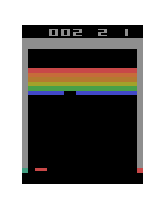
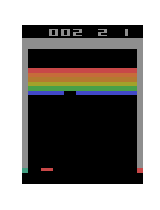
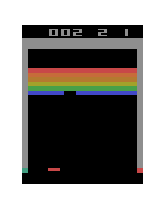
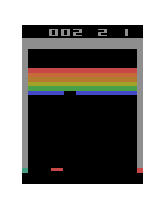
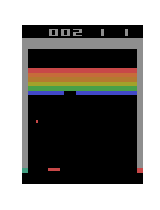
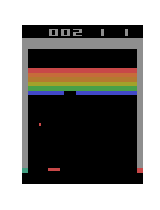
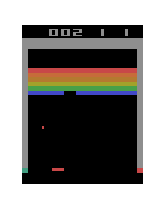
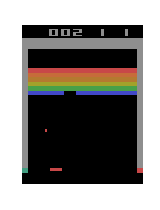
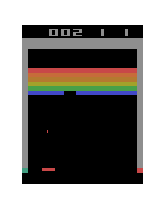
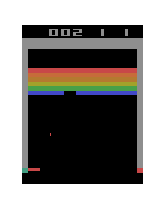
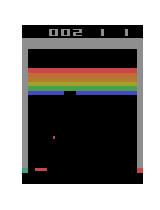
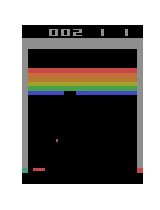
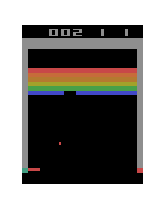
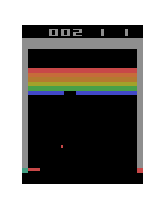
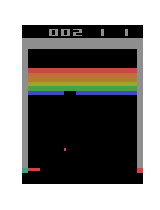
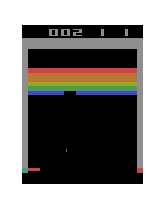
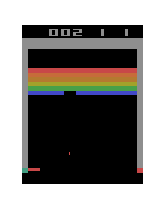
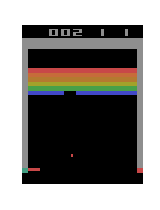
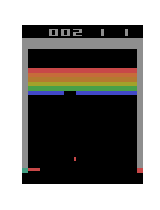
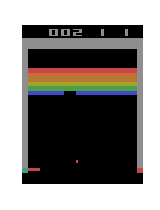
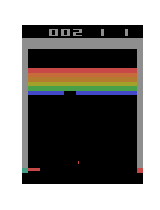
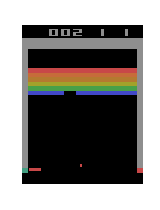
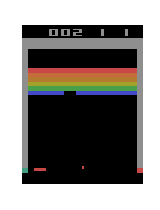
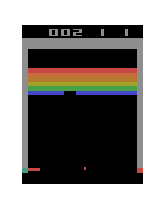
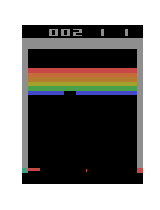
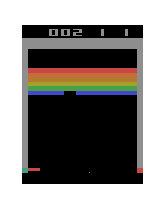
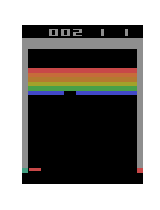
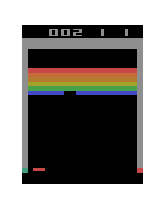
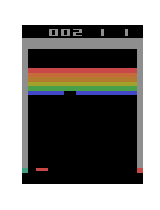
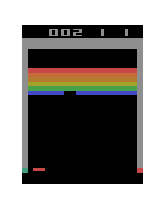
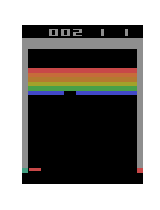
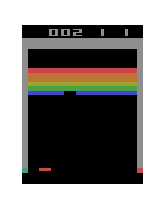
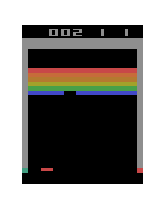

In [6]:
agent.render_gif()

In [7]:
agent.explorer.schedule.get()

0.8023129312122476